In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.express as px 
import plotly.graph_objects as go

# 1. MWG Stock Analysis 

In [2]:
# Import data
MWG = pd.read_csv(r'C:\Users\Acer\Documents\GitHub\PortfolioProject\MwgMarketAnalysis\MWG.csv')
MWG.head()

Date   Price    Open    High     Low   Vol. Change %
0  Sep 09, 2022  76,500  76,400  76,500  66,500  2.78M    6.99%
1  Sep 08, 2022  71,500  70,600  74,230  70,100  3.75M    1.13%
2  Sep 07, 2022  70,700  73,000  73,000  70,600  5.67M   -3.02%
3  Sep 06, 2022  72,900  72,500  77,500  72,400  2.60M    0.55%
4  Sep 05, 2022  72,500  75,700  75,700  72,500  2.69M   -2.03%

In [3]:
# Checking data type
MWG.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

## 1.1. Data Cleaning

In [4]:
# Change column name 
MWG = MWG.rename({'Price':'Close', 'Vol.':'Vol'},axis=1)

# Remove column 
MWG.drop(['Change %'],axis=1)

Date   Close    Open    High     Low      Vol
0     Sep 09, 2022  76,500  76,400  76,500  66,500    2.78M
1     Sep 08, 2022  71,500  70,600  74,230  70,100    3.75M
2     Sep 07, 2022  70,700  73,000  73,000  70,600    5.67M
3     Sep 06, 2022  72,900  72,500  77,500  72,400    2.60M
4     Sep 05, 2022  72,500  75,700  75,700  72,500    2.69M
...            ...     ...     ...     ...     ...      ...
2033  Jul 21, 2014   5,749   6,128   6,128   5,478    5.29M
2034  Jul 18, 2014   5,749   5,749   5,749   5,749    2.29M
2035  Jul 17, 2014   5,396   5,396   5,396   5,396    1.62M
2036  Jul 16, 2014   5,044   5,044   5,044   5,044  293.93K
2037  Jul 15, 2014   4,718   4,718   4,718   4,718  229.16K

[2038 rows x 6 columns]

In [5]:
# Replace string  
MWG['Close'] = MWG['Close'].str.replace(',','')
MWG['Open'] = MWG['Open'].str.replace(',','')
MWG['High'] = MWG['High'].str.replace(',','')
MWG['Low'] = MWG['Low'].str.replace(',','')

In [6]:
# Change data type 
MWG['Date'] = MWG['Date'].astype('datetime64[ns]')
MWG['Close'] = MWG['Close'].astype('float')
MWG['Open'] = MWG['Open'].astype('float')
MWG['High'] = MWG['High'].astype('float')
MWG['Low'] = MWG['Low'].astype('float')

In [7]:
def value_to_float(x):
    if 'K' in x: 
        return float(x.replace('K','')) * 1000 
    elif 'M' in x: 
        return float(x.replace('M','')) * 1000000

MWG['Vol'] = MWG['Vol'].apply(value_to_float)  

In [8]:
# Set date in index 
MWG = MWG.set_index('Date')

In [9]:
# Check data types 
MWG.dtypes

Close       float64
Open        float64
High        float64
Low         float64
Vol         float64
Change %     object
dtype: object

## 1.2. Visualization

### Stock Price of MWG

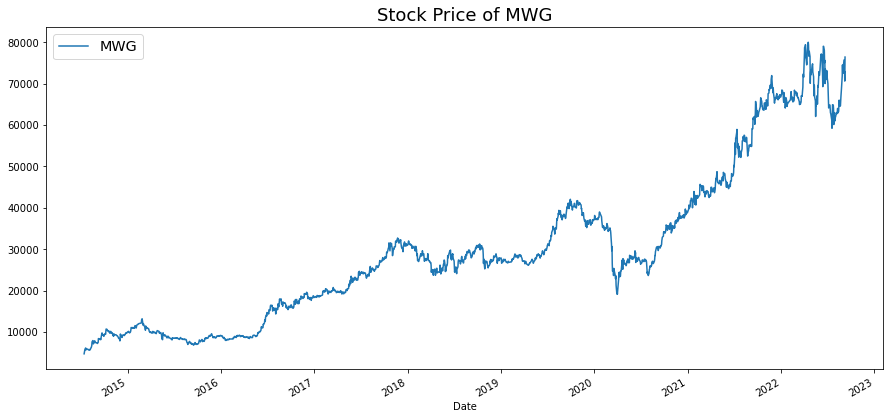

In [10]:
# Visualize Stock Price of MWG
MWG['Open'].plot(figsize=(15,7),label='MWG')
plt.title('Stock Price of MWG',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Stock Volume of MWG

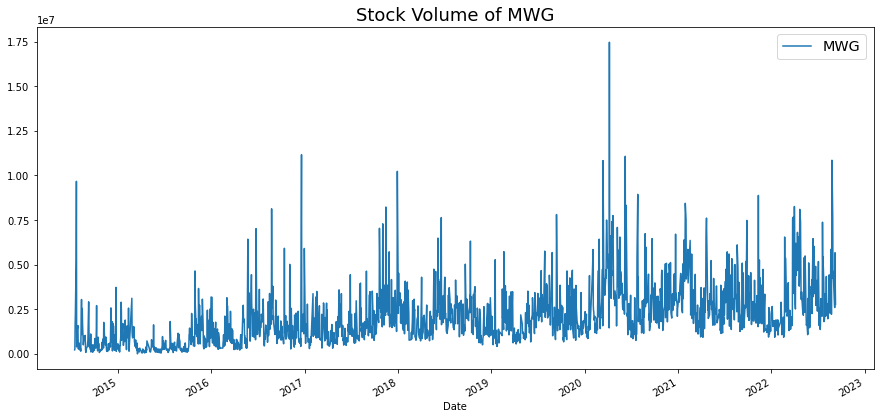

In [11]:
# Visualize Volume of MWG
MWG['Vol'].plot(figsize=(15,7),label='MWG')
plt.title('Stock Volume of MWG',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Total Trade of MWG

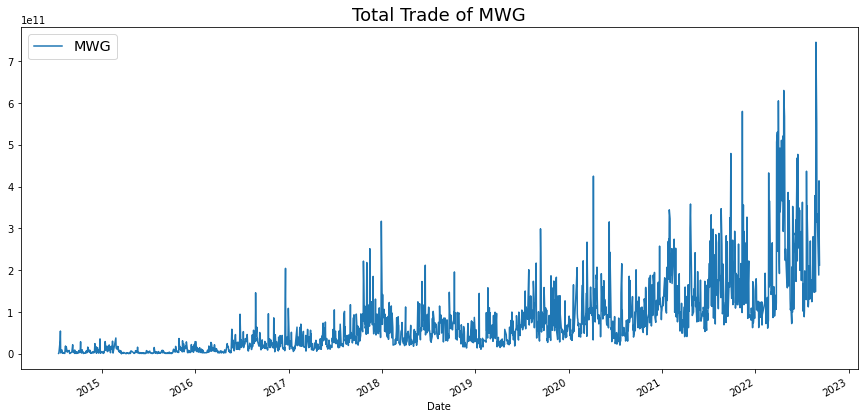

In [12]:
# Calculate Total Trade
MWG['Total Trade'] = MWG['Open'] * MWG['Vol']

# Visualize Total Trade of MWG
MWG['Total Trade'].plot(figsize=(15,7),label='MWG')
plt.title('Total Trade of MWG',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Cumulative Return of Stock

In [13]:
# Calculate Daily Return 
MWG['returns'] = (MWG['Close'] / MWG['Close'].shift(1)) - 1

# Calculate Cumulative Return 
MWG['Cumulative Return'] = (1 + MWG['returns']).cumprod()

# Visualize the Cumulative Return of stocks
fig = go.Figure()

fig.add_trace(go.Scatter(
    name = 'MWG',
    x = MWG.index,
    y = MWG['Cumulative Return'],
    connectgaps = True
))

fig.update_layout(title_text = 'Cumulative Return of MWG',width = 1000, height = 500)
fig.update_xaxes(title_text = 'Year')
fig.update_yaxes(title_text = 'Cumulative Return')

fig.show()

# 2. Compare MWG and FRT's Stock 

In [14]:
# Import data
MWG = pd.read_csv(r'C:\Users\Acer\Documents\GitHub\PortfolioProject\MwgMarketAnalysis\MWG Historical Data.csv')
FRT = pd.read_csv(r'C:\Users\Acer\Documents\GitHub\PortfolioProject\MwgMarketAnalysis\FRT Historical Data.csv')

In [15]:
# Checking data type
MWG.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

## 2.1. Data Cleaning

In [16]:
# Change column name 
MWG = MWG.rename({'Price':'Close', 'Vol.':'Vol'},axis=1)
FRT = FRT.rename({'Price':'Close', 'Vol.':'Vol'},axis=1)

# Remove column 
MWG.drop(['Change %'],axis=1)
FRT.drop(['Change %'],axis=1)

Date     Close      Open      High       Low     Vol
0     Aug 26, 2022  89,000.0  89,000.0  91,900.0  88,900.0   1.75M
1     Aug 25, 2022  89,100.0  88,000.0  91,000.0  86,600.0   3.26M
2     Aug 24, 2022  88,300.0  90,000.0  90,400.0  87,800.0   1.56M
3     Aug 23, 2022  89,000.0  87,100.0  89,000.0  86,800.0   1.07M
4     Aug 22, 2022  88,500.0  86,000.0  89,900.0  86,000.0   2.16M
...            ...       ...       ...       ...       ...     ...
997   Aug 31, 2018  41,688.1  41,469.8  41,688.1  40,651.4  14.97K
998   Aug 30, 2018  41,469.8  41,415.3  41,469.8  40,378.5  81.75K
999   Aug 29, 2018  41,415.3  43,652.5  43,652.5  40,760.5  40.52K
1000  Aug 28, 2018  40,924.2  40,760.5  40,924.2  40,378.5  41.43K
1001  Aug 27, 2018  40,760.5  40,924.2  40,924.2  40,705.9  36.47K

[1002 rows x 6 columns]

In [17]:
# Replace string  
MWG['Close'] = MWG['Close'].str.replace(',','')
MWG['Open'] = MWG['Open'].str.replace(',','')
MWG['High'] = MWG['High'].str.replace(',','')
MWG['Low'] = MWG['Low'].str.replace(',','')

FRT['Close'] = FRT['Close'].str.replace(',','')
FRT['Open'] = FRT['Open'].str.replace(',','')
FRT['High'] = FRT['High'].str.replace(',','')
FRT['Low'] = FRT['Low'].str.replace(',','')

In [18]:
# Change data type 
MWG['Date'] = MWG['Date'].astype('datetime64[ns]')
MWG['Close'] = MWG['Close'].astype('float')
MWG['Open'] = MWG['Open'].astype('float')
MWG['High'] = MWG['High'].astype('float')
MWG['Low'] = MWG['Low'].astype('float')

FRT['Date'] = FRT['Date'].astype('datetime64[ns]')
FRT['Close'] = FRT['Close'].astype('float')
FRT['Open'] = FRT['Open'].astype('float')
FRT['High'] = FRT['High'].astype('float')
FRT['Low'] = FRT['Low'].astype('float')

In [19]:
def value_to_float(x):
    if 'K' in x: 
        return float(x.replace('K','')) * 1000 
    elif 'M' in x: 
        return float(x.replace('M','')) * 1000000

MWG['Vol'] = MWG['Vol'].apply(value_to_float)
FRT['Vol'] = FRT['Vol'].apply(value_to_float)     

In [20]:
# Set date in index 
MWG = MWG.set_index('Date')
FRT = FRT.set_index('Date')

## 2.2. Visualization

###  Stock Prices of MWG and FRT 

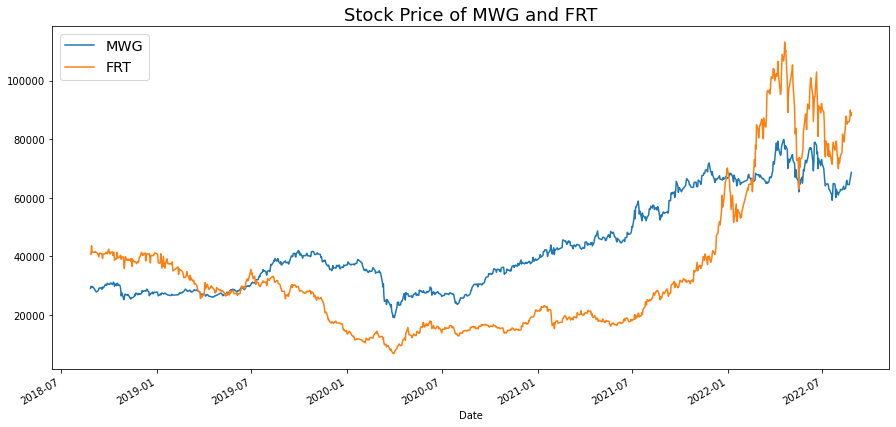

In [21]:
# Visualize Stock Price of MWG and FRT 
MWG['Open'].plot(figsize=(15,7),label='MWG')
FRT['Open'].plot(label='FRT')
plt.title('Stock Price of MWG and FRT',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Volume of MWG and FRT

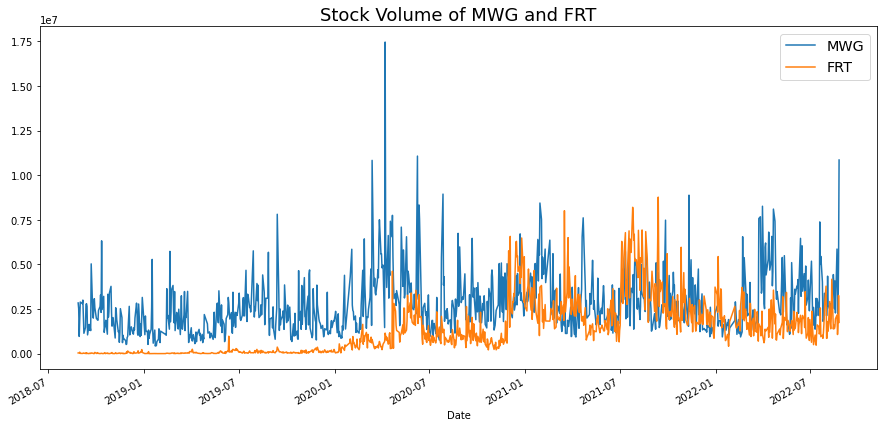

In [22]:
# Visualize Volume of MWG and FRT
MWG['Vol'].plot(figsize=(15,7),label='MWG')
FRT['Vol'].plot(label='FRT')
plt.title('Stock Volume of MWG and FRT',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Total Trade of MWG and FRT

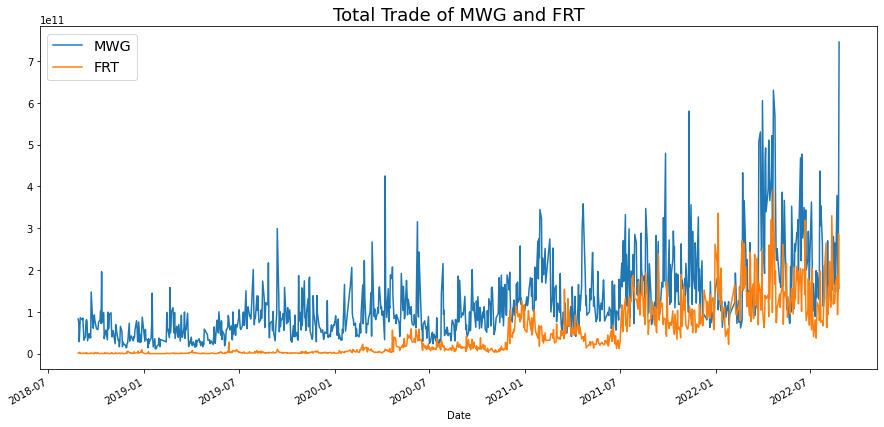

In [23]:
# Calculate Total Trade
MWG['Total Trade'] = MWG['Open'] * MWG['Vol']
FRT['Total Trade'] = FRT['Open'] * FRT['Vol']

# Visualize Total Trade of MWG and FRT 
MWG['Total Trade'].plot(figsize=(15,7),label='MWG')
FRT['Total Trade'].plot(label='FRT')
plt.title('Total Trade of MWG and FRT',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Moving Average of MWG and FRT

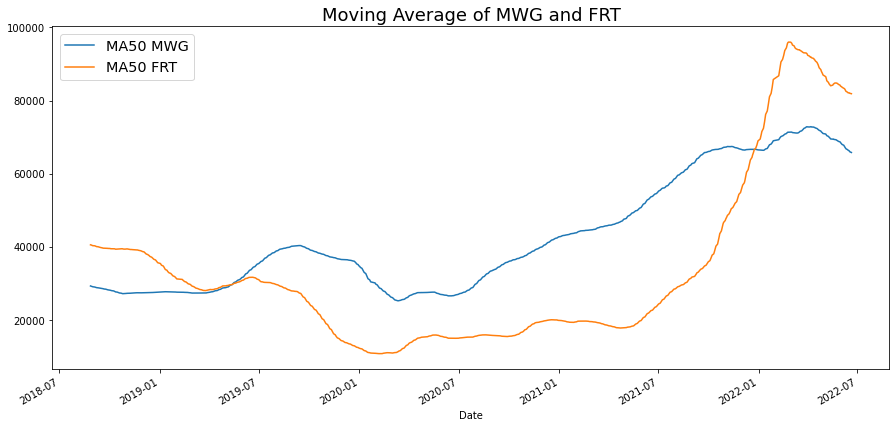

In [24]:
# Calculate Moving Average
MWG['MA50'] = MWG['Open'].rolling(50).mean()
FRT['MA50'] = FRT['Open'].rolling(50).mean()

# Visualize Moving Average of MWG and FRT
MWG['MA50'].plot(figsize=(15,7),label='MA50 MWG')
FRT['MA50'].plot(label='MA50 FRT')
plt.title('Moving Average of MWG and FRT',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

### Daily Return 

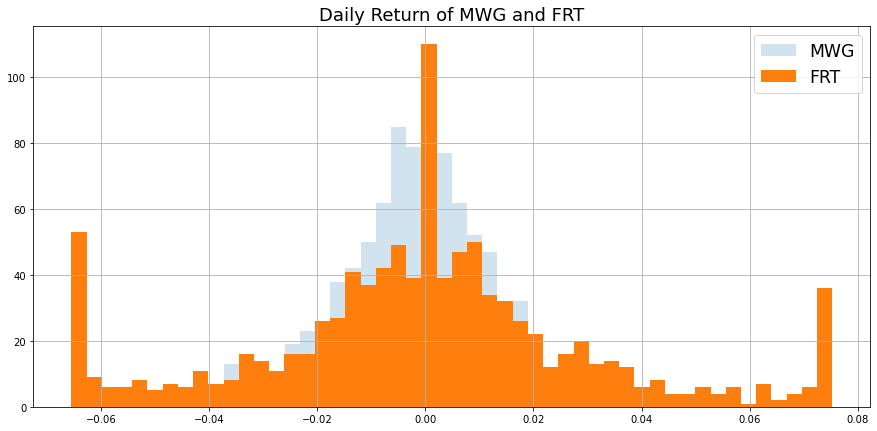

In [25]:
# Calculate Daily Return 
MWG['returns'] = (MWG['Close'] / MWG['Close'].shift(1)) - 1
FRT['returns'] = (FRT['Close'] / FRT['Close'].shift(1)) - 1

# Visualize Daily Return of MWG and FRT
MWG['returns'].hist(bins=50, label='MWG',alpha=0.2,figsize=(15,7))
FRT['returns'].hist(bins=50,label='FRT')
plt.title('Daily Return of MWG and FRT',fontsize=18)
plt.legend(fontsize='xx-large')

### Cumulative Return of Stock

In [26]:
# Calculate Cumulative Return 
MWG['Cumulative Return'] = (1 + MWG['returns']).cumprod()
FRT['Cumulative Return'] = (1 + FRT['returns']).cumprod()

# Visualize the Cumulative Return of Stocks
fig = go.Figure()

fig.add_trace(go.Scatter(
    name = 'MWG',
    x = MWG.index,
    y = MWG['Cumulative Return'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name = 'FRT',
    x = FRT.index,
    y = FRT['Cumulative Return'],
    connectgaps = True
))

fig.update_layout(title_text = 'Cumulative Return of MWG and FRT',width = 1000, height = 500)
fig.update_xaxes(title_text = 'Year')
fig.update_yaxes(title_text = 'Cumulative Return')

fig.show()